In [1]:
#data collection of a stock
import pandas_datareader as pdr

In [2]:
import requests

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=1648ebb62f69515e79373813e3ac8f7a31e787ae",
                                    headers=headers)
print(requestResponse.json())
                        

{'message': 'You successfully sent a request'}


In [3]:
from tiingo import TiingoClient
config = {}

# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "put your api key here"

# Initialize
client = TiingoClient(config)

In [4]:
import pandas as pd

In [13]:
df=client.get_dataframe("AAPL",startDate='2017-01-01')

In [14]:
df

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2017-01-03 00:00:00+00:00,116.15,116.3300,114.76,115.80,28781865,27.456445,27.498995,27.127866,27.373709,115127460,0.0,1.0
2017-01-04 00:00:00+00:00,116.02,116.5100,115.75,115.85,21118116,27.425715,27.541545,27.361890,27.385529,84472464,0.0,1.0
2017-01-05 00:00:00+00:00,116.61,116.8642,115.81,115.92,22193587,27.565184,27.625273,27.376073,27.402076,88774348,0.0,1.0
2017-01-06 00:00:00+00:00,117.91,118.1600,116.47,116.78,31751900,27.872488,27.931585,27.532089,27.605370,127007600,0.0,1.0
2017-01-09 00:00:00+00:00,118.99,119.4300,117.94,117.95,33561948,28.127787,28.231797,27.879579,27.881943,134247792,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26 00:00:00+00:00,121.26,124.8500,121.20,122.59,163424672,121.260000,124.850000,121.200000,122.590000,163424672,0.0,1.0
2021-03-01 00:00:00+00:00,127.79,127.9300,122.79,123.75,116307892,127.790000,127.930000,122.790000,123.750000,116307892,0.0,1.0
2021-03-02 00:00:00+00:00,125.12,128.7200,125.01,128.41,102260945,125.120000,128.720000,125.010000,128.410000,102260945,0.0,1.0


In [15]:
df=df.reset_index()

In [16]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2017-01-03 00:00:00+00:00,116.15,116.3300,114.76,115.80,28781865,27.456445,27.498995,27.127866,27.373709,115127460,0.0,1.0
1,2017-01-04 00:00:00+00:00,116.02,116.5100,115.75,115.85,21118116,27.425715,27.541545,27.361890,27.385529,84472464,0.0,1.0
2,2017-01-05 00:00:00+00:00,116.61,116.8642,115.81,115.92,22193587,27.565184,27.625273,27.376073,27.402076,88774348,0.0,1.0
3,2017-01-06 00:00:00+00:00,117.91,118.1600,116.47,116.78,31751900,27.872488,27.931585,27.532089,27.605370,127007600,0.0,1.0
4,2017-01-09 00:00:00+00:00,118.99,119.4300,117.94,117.95,33561948,28.127787,28.231797,27.879579,27.881943,134247792,0.0,1.0


In [17]:
df1=df.reset_index()['close']

In [18]:
df1.shape

(1049,)

In [19]:
import matplotlib.pyplot as plt

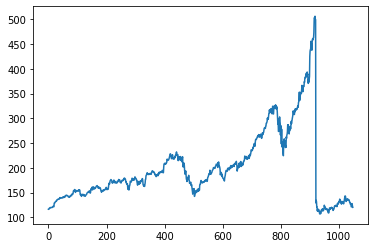

In [20]:
plt.plot(df1)

## LSTM are sensitive to the scale of the data so we have to apply scale here

So we are applying min max scaler here

In [21]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
df1.shape

(1049, 1)

# for time series data to divide into train and test

just remember that split in a way such that first part will be in training and later in test dataset
ex. 120,125,165,147,256,236,120,897,200,360
train:-120,125,165,147,256,236,120, test:-897,200,360
        bcz in time serise data depends on previous day output

In [23]:
train_size=int(len(df1)*0.67)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [24]:
train_data,test_data

(array([[0.02331872],
        [0.02299311],
        [0.02447088],
        [0.02772699],
        [0.03043206],
        [0.03073262],
        [0.03233563],
        [0.03108328],
        [0.03055729],
        [0.0329618 ],
        [0.03293676],
        [0.03241077],
        [0.0329618 ],
        [0.03316218],
        [0.03288666],
        [0.03767063],
        [0.03782091],
        [0.03784596],
        [0.03704446],
        [0.03634314],
        [0.0548779 ],
        [0.05432686],
        [0.05570445],
        [0.05873513],
        [0.06184095],
        [0.06311835],
        [0.06407013],
        [0.06331872],
        [0.06624922],
        [0.07058234],
        [0.07180964],
        [0.07139637],
        [0.07233563],
        [0.07479023],
        [0.07581716],
        [0.07436443],
        [0.07469004],
        [0.07536631],
        [0.07551659],
        [0.08252974],
        [0.08045085],
        [0.0825047 ],
        [0.08140263],
        [0.08185348],
        [0.08055103],
        [0

refer notepad to see how we did train test model


In [25]:
import numpy as np
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]    #i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [26]:
time_step=80
x_train,y_train =create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [27]:
x_train

array([[0.02331872, 0.02299311, 0.02447088, ..., 0.094402  , 0.09227301,
        0.09254853],
       [0.02299311, 0.02447088, 0.02772699, ..., 0.09227301, 0.09254853,
        0.09219787],
       [0.02447088, 0.02772699, 0.03043206, ..., 0.09254853, 0.09219787,
        0.09953663],
       ...,
       [0.2280025 , 0.23198497, 0.23028178, ..., 0.2944521 , 0.30103945,
        0.30870382],
       [0.23198497, 0.23028178, 0.22978084, ..., 0.30103945, 0.30870382,
        0.32403256],
       [0.23028178, 0.22978084, 0.2222417 , ..., 0.30870382, 0.32403256,
        0.32318096]])

In [28]:
y_train

array([0.09219787, 0.09953663, 0.101866  , 0.10073889, 0.0994114 ,
       0.10549781, 0.11564183, 0.11809643, 0.116268  , 0.11799624,
       0.12338134, 0.12237946, 0.12180338, 0.10872887, 0.11446462,
       0.11576706, 0.11809643, 0.11762054, 0.11646838, 0.11779587,
       0.11714465, 0.11729493, 0.11501565, 0.11606763, 0.12175329,
       0.11794615, 0.11924859, 0.12155291, 0.12060113, 0.1055479 ,
       0.09663118, 0.09956168, 0.09597996, 0.09380088, 0.08874139,
       0.0989355 , 0.09560426, 0.0977583 , 0.09715717, 0.09878522,
       0.09763306, 0.09239825, 0.09765811, 0.09227301, 0.09312461,
       0.09182217, 0.09329994, 0.08989355, 0.09352536, 0.09572949,
       0.0969067 , 0.09743269, 0.10251722, 0.10569818, 0.10700063,
       0.10830307, 0.11065748, 0.10895429, 0.10877896, 0.11333751,
       0.11496556, 0.11676894, 0.10950532, 0.10685034, 0.10492173,
       0.10822793, 0.12598622, 0.12205385, 0.1241077 , 0.13016907,
       0.13335003, 0.13580463, 0.12142768, 0.12683782, 0.13277

In [29]:
x_train.shape

(621, 80)

In [30]:
x_test.shape

(266, 80)

In [31]:
y_train.shape

(621,)

In [32]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
#for lstm we have to provide input to lstm as 1 and the number we have to provide for look back

#The LSTM network expects the input data (X) to be provided with a specific array structure 
#in the form of: [samples, time steps, features].
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(80,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 80, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 80, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
10/10 [==============================] - 6s 205ms/step - loss: 0.0137 - val_loss: 0.0480
Epoch 2/50
10/10 [==============================] - 1s 75ms/step - loss: 0.0022 - val_loss: 0.0333
Epoch 3/50
10/10 [==============================] - 1s 75ms/step - loss: 0.0014 - val_loss: 0.0398
Epoch 4/50
10/10 [==============================] - 1s 77ms/step - loss: 0.0011 - val_loss: 0.0298
Epoch 5/50
10/10 [==============================] - 1s 75ms/step - loss: 8.3615e-04 - val_loss: 0.0280
Epoch 6/50
10/10 [==============================] - 1s 74ms/step - loss: 5.9429e-04 - val_loss: 0.0263
Epoch 7/50
10/10 [==============================] - 1s 76ms/step - loss: 5.3700e-04 - val_loss: 0.0256
Epoch 8/50
10/10 [==============================] - 1s 75ms/step - loss: 4.6482e-04 - val_loss: 0.0257
Epoch 9/50
10/10 [==============================] - 1s 75ms/step - loss: 4.6277e-04 - val_loss: 0.0248
Epoch 10/50
10/10 [==============================] - 1s 78ms/step - loss: 4.7353e-04 - v

In [38]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [39]:
train_predict=scaler.inverse_transform(train_pred)
test_predict=scaler.inverse_transform(test_pred)

In [40]:
import math

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
math.sqrt(mean_squared_error(y_train,train_predict))

180.86485730969713

In [43]:
math.sqrt(mean_squared_error(y_test,test_predict))

252.5790771285146

to apply root mean square error

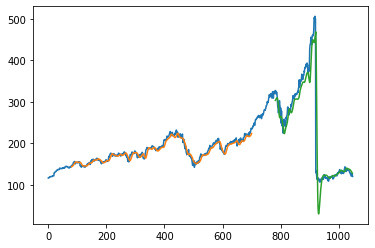

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=80
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

347

In [46]:
x_input=test_data[197:].reshape(1,-1)
x_input.shape

(1, 150)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.696105197244834,
 0.7969943644333124,
 0.8238196618659985,
 0.8311083281152161,
 0.8350907952410769,
 0.8735629304946775,
 0.8456105197244832,
 0.8617908578584845,
 0.8282028804007513,
 0.864621164683782,
 0.8846587351283657,
 0.8836318096430806,
 0.8806261740763932,
 0.8901941139636818,
 0.8916468378209141,
 0.9173700688791484,
 0.9784345648090169,
 0.9933375078271758,
 0.9829931120851596,
 0.9999999999999998,
 0.9848465873512835,
 0.9828177833437695,
 0.05560425798371943,
 0.06847839699436442,
 0.061515341264871626,
 0.03516593613024416,
 0.03536631183468997,
 0.01497808390732619,
 0.02624921728240448,
 0.01665623043206005,
 0.012924232936756375,
 0.02132748904195364,
 0.021790857858484614,
 0.013249843456480837,
 0.008766437069505306,
 0.0,
 0.008115216030056327,
 0.012448340638697541,
 0.0007013149655604178,
 0.0034564809016906506,
 0.013625547902316792,
 0.020338134001252284,
 0.018159048215403872,
 0.022467125860989312,
 0.024921728240450802,
 0.015479023168440798,
 0.02419536

In [55]:
#to demonstrate the next 30 days
from numpy import array

lst_output=[]
n_steps=80
i=0
while(i<30):
    
    if(len(temp_input)>80):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [7.96994364e-01 8.23819662e-01 8.31108328e-01 8.35090795e-01
 8.73562930e-01 8.45610520e-01 8.61790858e-01 8.28202880e-01
 8.64621165e-01 8.84658735e-01 8.83631810e-01 8.80626174e-01
 8.90194114e-01 8.91646838e-01 9.17370069e-01 9.78434565e-01
 9.93337508e-01 9.82993112e-01 1.00000000e+00 9.84846587e-01
 9.82817783e-01 5.56042580e-02 6.84783970e-02 6.15153413e-02
 3.51659361e-02 3.53663118e-02 1.49780839e-02 2.62492173e-02
 1.66562304e-02 1.29242329e-02 2.13274890e-02 2.17908579e-02
 1.32498435e-02 8.76643707e-03 0.00000000e+00 8.11521603e-03
 1.24483406e-02 7.01314966e-04 3.45648090e-03 1.36255479e-02
 2.03381340e-02 1.81590482e-02 2.24671259e-02 2.49217282e-02
 1.54790232e-02 2.41953663e-02 1.58296807e-02 2.06386976e-02
 2.03631810e-02 2.53725736e-02 4.39824671e-02 3.57169693e-02
 3.59423920e-02 3.47401378e-02 3.05072010e-02 2.28929242e-02
 2.67251096e-02 2.51221039e-02 2.23168441e-02 2.05385097e-02
 2.05635567e-02 2.44458359e-02 1.09204759e-02 2.12398247e-02
 5.05948654e

ValueError: cannot reshape array of size 149 into shape (1,80,1)

In [49]:
day_new=np.arange(1,80)
day_pred=np.arange(81,111)


In [50]:
len(df1)

1049

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

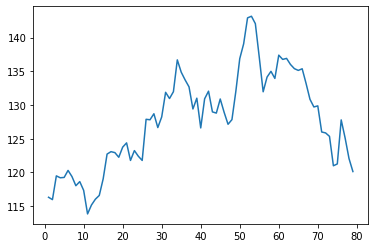

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[970:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

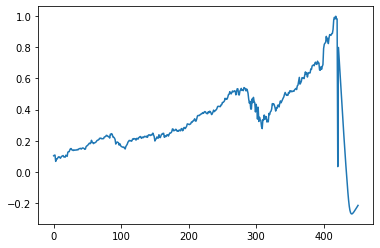

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[500:])